In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

%matplotlib inline

In [2]:
x = np.array([0.1, 1, 2, 6, 7, 30])
y = np.array([0.02, 0.02, 0.02, 0.03, 0.02, 0.02])

For quartic polynomials, we have five unknowns per equation and for $N$ points, we have $N-1$ different quartics. Therefore, we have $5(N-1)$ unknowns to determine.  

We know the value of each polynomial segment at each of the node points. This gives us $2N-2$ equations.  For quartic equations, we insist the first and second derivatives be continuous at each of the internal node points.  This gives us another $2(N-2)$ equations.  We are not two equations short.  We can get these from (somewhat arbitrary) boundary choices.  In this case, we will use the not-a-knot condition and specify that the third derivative is continuous at the second and second-to-last point.  This gives us the same number of equations as unknowns.

In practice, splines are usually calculated using the form,
$$d(x-x_i)^3 + c(x-x_i)^2 + b(x-x_1) + a$$
on the interval between $x_i$ and $x_{i+1}$

The equations would be:
$$\text{Interval 1:} \quad d_1(x-1)^3 + c_1(x-1)^2 + b_1(x-1) + a_1$$
$$\text{Interval 2:} \quad d_2(x-2)^3 + c_2(x-2)^2 + b_2(x-2) + a_2$$
$$\text{Interval 3:} \quad d_3(x-3)^3 + c_3(x-3)^2 + b_3(x-3) + a_3$$
$$\text{Interval 4:} \quad d_4(x-4)^3 + c_4(x-4)^2 + b_4(x-4) + a_4$$

##  Continuity of Function

First point
$$e_1(0.1-.01)^4 + d_1(0.1-0.1)^3  + c_1(0.1-0.1)^2 + b_1(0.1-0.1) + a_1 = 0.02$$

Second point
$$e_1(1-0.1)^4 + d_1(1-0.1)^3 + c_1(1-0.1)^2 + b_1(1-0.1) + a_1 = 0.02$$
$$e_2(1-1)^4 + d_2(1-1)^3 + c_2(1-1)^2 + b_2(1-1) + a_2 = 0.02$$

Third point
$$e_2(2-1)^4 + d_2(2-1)^3 + c_2(2-1)^2 + b_2(2-1) + a_2 = 0.02$$
$$e_3(2-2)^4 + d_3(2-2)^3 + c_3(2-2)^2 + b_3(2-2) + a_3 = 0.02$$

Fourth point
$$e_3(6-2)^4 + d_3(6-2)^3 + c_3(6-2)^2 + b_3(6-2) + a_3 = 0.03$$
$$e_4(6-6)^4 + d_4(6-6)^3 + c_4(6-6)^2 + b_4(6-6) + a_4 = 0.03$$

Fifth point
$$e_4(7-6)^4 + d_4(7-6)^3 + c_4(7-6)^2 + b_4(7-6) + a_4 = 0.02$$
$$e_5(7-7)^4 + d_5(7-7)^3 + c_5(7-7)^2 + b_5(7-7) + a_5 = 0.02$$

Sixth point
$$e_5(30-7)^4 + d_5(30-7)^3 + c_5(30-7)^2 + b_5(30-7) + a_5 = 0.02$$

## Continuity of Derivatives

Second Point
$$b_1 + 2c_1(1-0.1) + 3d_1(1-0.1)^2 + 4e_1(1-0.1)^3 - b_2 - 2c_2(1-1) - 3d_2(1-1)^2 - 4e_2(1-1)^3 = 0$$
$$2c_1 + 6d_1(1-0.1) + 12e_1(1-0.1)^2 - 2c_2 - 6d_2(1-1) - 12e_2(1-1)^2 = 0$$
$$6d_1 + 24e_1(1-0.1) - 6d_2 - 24e_2(1-1) = 0$$

Third Point
$$b_2 + 2c_2(2-1) + 3d_2(2-1)^2 + 4e_2(2-1)^3 - b_3 - 2c_3(2-2) - 3d_3(2-2)^2 - 4e_3(2-2)^3 = 0$$
$$2c_2 + 6d_2(2-1) + 12e_2(2-1)^2 - 2c_3 - 6d_3(2-2) - 12e_3(2-2)^2 = 0$$
$$6d_2 + 24e_2(2-1) - 6d_3 - 24e_3(2-2) = 0$$

Fourth Point
$$b_3 + 2c_3(6-2) + 3d_3(6-2)^2 + 4e_3(6-2)^3 - b_4 - 2c_4(6-6) - 3d_4(6-6)^2 - 4e_4(6-6)^3 = 0$$
$$2c_3 + 6d_3(6-2) + 12e_3(6-2)^2 - 2c_4 - 6d_4(6-6) - 12e_4(6-6)^2 = 0$$
$$6d_3 + 24e_3(6-2) - 6d_4 - 24e_4(6-6) = 0$$

Fifth Point
$$b_4 + 2c_4(7-6) + 3d_4(7-6)^2 + 4e_4(7-6)^3 - b_5 - 2c_5(7-7) - 3d_5(7-7)^2 - 4e_5(7-7)^3 = 0$$
$$2c_4 + 6d_4(7-6) + 12e_4(7-6)^2 - 2c_5 - 6d_5(7-7) - 12e_5(7-7)^2 = 0$$
$$6d_4 + 24e_4(7-6) - 6d_5 - 24e_5(7-7) = 0$$

## Boundary Conditions
$$f'(30) = 0$$ 
$$f''(0.1) = 0$$
$$f''(30) = 0$$

- The first condition ensures that the right-hand end of the curve is flat at t = 30. 
- The last two of these conditions constrain the second derivatives of the forward curve at both the left-hand and right-hand ends to be zero.

$$b_5 + 2c_5(30-7) + 3d_5(30-7)^2 + 4e_5(30-7)^3=0$$
$$2c_1 + 6d_1(0.1-0.1) + 12e_1(0.1-0.1)^2 = 0$$
$$2c_5 + 6d_5(30-7) + 12e_5(30-7)^2 = 0$$

Now that we have our system of equations, all that remains is to solve it.  This is a simple linear algebra problem.  Alothough the matrix is sparse, I am not going to bother with that and instead use a dense matrix.  Obviously, for code in the real world, you'd probably try to take advatage of the sparcity.

This is how I will organize the vector of unknowns.
$$
\begin{pmatrix}
e_1 \\
d_1 \\
c_1 \\
b_1 \\
a_1 \\
e_2 \\
d_2 \\
c_2 \\
b_2 \\
a_2 \\
e_3 \\
d_3 \\
c_3 \\
b_3 \\
a_3 \\
e_4 \\
d_4 \\
c_4 \\
b_4 \\
a_4 \\
e_5 \\
d_5 \\
c_5 \\
b_5 \\
a_5 \\
\end{pmatrix}
$$

Each of the equations above will be represented by a row vector, then stacked into a single matrix equation.

In [5]:
# Column Number: 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19
# Column Label: e1, d1, c1, b1, a1, e2, d2, c2, b2, a2, e3, d3, c3, b3, a3, e4, d4, c4, b4, a4

# Column Number: 20, 21, 22, 23, 24  
# Column Label:  e5, d5, c5, b5, a5  

# Row 0 & 1 - first polynomial
row0 = np.zeros(25)
temp = np.array([1,1,1,1,1]) * np.array([(0.1-0.1)**4, (0.1-0.1)**3,(0.1-0.1)**2, (0.1-0.1)**1, (0.1-0.1)**0])
row0[0:5] = temp
row1 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(1-0.1)**4, (1-0.1)**3, (1-0.1)**2, (1-0.1)**1, (1-0.1)**0])
row1[0:5] = temp

# Row 2 & 3 - second polynomial
row2 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(1-1)**4, (1-1)**3, (1-1)**2, (1-1)**1, (1-1)**0])
row2[5:10] = temp
row3 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(2-1)**4, (2-1)**3, (2-1)**2, (2-1)**1, (2-1)**0])
row3[5:10] = temp

# Row 4 & 5 - third polynomial
row4 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(2-2)**4, (2-2)**3, (2-2)**2, (2-2)**1, (2-2)**0])
row4[10:15] = temp
row5 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(6-2)**4, (6-2)**3, (6-2)**2, (6-2)**1, (6-2)**0])
row5[10:15] = temp

# Row 6 & 7 - fourth polynomial
row6 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(6-6)**4, (6-6)**3, (6-6)**2, (6-6)**1, (6-6)**0])
row6[15:20] = temp
row7 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(7-6)**4, (7-6)**3, (7-6)**2, (7-6)**1, (7-6)**0])
row7[15:20] = temp

# Row 8 & 9 - fifth polynomial
row8 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(7-7)**4, (7-7)**3, (7-7)**2, (7-7)**1, (7-7)**0])
row8[20:25] = temp
row9 = np.zeros(25)
temp = np.array([1,1,1,1,1]) *  np.array([(30-7)**4, (30-7)**3, (30-7)**2, (30-7)**1, (30-7)**0])
row9[20:25] = temp

# Row 10 - first & second polynomial continuity - first derivative
row10 = np.zeros(25)
temp = np.array([4, 3, 2, 1, 0]) * np.array([(1-0.1)**3, (1-0.1)**2, (1-0.1)**1, (1-0.1)**0, 0])
row10[0:5] = temp
temp = np.array([4, 3, 2, 1, 0]) * np.array([(1-1)**3, (1-1)**2, (1-1)**1, (1-1)**0, 0])
row10[5:10] = -temp

# Row 11 - second & third polynomial continuity - first derivative
row11 = np.zeros(25)
temp = np.array([4, 3, 2, 1, 0]) * np.array([(2-1)**3, (2-1)**2, (2-1)**1, (2-1)**0, 0])
row11[5:10] = temp
temp = np.array([4, 3, 2, 1, 0]) * np.array([(2-2)**3, (2-2)**2, (2-2)**1, (2-2)**0, 0])
row11[10:15] = -temp

# Row 12 - third & fourth polynomial continuity - first derivative
row12 = np.zeros(25)
temp = np.array([4, 3, 2, 1, 0]) * np.array([(6-2)**3, (6-2)**2, (6-2)**1, (6-2)**0, 0])
row12[10:15] = temp
temp = np.array([4, 3, 2, 1, 0]) * np.array([(6-6)**3, (6-6)**2, (6-6)**1, (6-6)**0, 0])
row12[15:20] = -temp

# Row 13 - fourth & fifth polynomial continuity - first derivative
row13 = np.zeros(25)
temp = np.array([4, 3, 2, 1, 0]) * np.array([(7-6)**3, (7-6)**2, (7-6)**1, (7-6)**0, 0])
row13[15:20] = temp
temp = np.array([4, 3, 2, 1, 0]) * np.array([(7-7)**3, (7-7)**2, (7-7)**1, (7-7)**0, 0])
row13[20:25] = -temp

# Row 14 - first & second polynomial continuity - second derivative
row14 = np.zeros(25)
temp = np.array([12, 6, 2, 0, 0]) * np.array([(1-0.1)**2, (1-0.1)**1, (1-0.1)**0, 0, 0])
row14[0:5] = temp
temp = np.array([12, 6, 2, 0, 0]) * np.array([(1-1)**2, (1-1)**1, (1-0.1)**0, 0, 0])
row14[5:10] = -temp

# Row 15 - second & third polynomial continuity - second derivative
row15 = np.zeros(25)
temp = np.array([12, 6, 2, 0, 0]) * np.array([(2-1)**2, (2-1)**1, (2-1)**0, 0, 0])
row15[5:10] = temp
temp = np.array([12, 6, 2, 0, 0]) * np.array([(2-2)**2, (2-2)**1, (2-2)**0, 0, 0])
row15[10:15] = -temp

# Row 16 - third & fourth polynomial continuity - second derivative
row16 = np.zeros(25)
temp = np.array([12, 6, 2, 0, 0]) * np.array([(6-2)**2, (6-2)**1, (6-2)**0, 0, 0])
row16[10:15] = temp
temp = np.array([12, 6, 2, 0, 0]) * np.array([(6-6)**2, (6-6)**1, (6-6)**0, 0, 0])
row16[15:20] = -temp

# Row 17 - fourth & fifth polynomial continuity - second derivative
row17 = np.zeros(25)
temp = np.array([12, 6, 2, 0, 0]) * np.array([(7-6)**2, (7-6)**1, (7-6)**0, 0, 0])
row17[15:20] = temp
temp = np.array([12, 6, 2, 0, 0]) * np.array([(7-7)**2, (7-7)**1, (7-7)**0, 0, 0])
row17[20:25] = -temp

# Row 18 - first & second polynomial continuity - third derivative
row18 = np.zeros(25)
temp = np.array([24, 6, 0, 0, 0]) * np.array([(1-0.1)**1, (1-0.1)**0, 0, 0, 0])
row18[0:5] = temp
temp = np.array([24, 6, 0, 0, 0]) * np.array([(1-1)**1, (1-1)**0, 0, 0, 0])
row18[5:10] = -temp

# Row 19 - second & third polynomial continuity - third derivative
row19 = np.zeros(25)
temp = np.array([24, 6, 0, 0, 0]) * np.array([(2-1)**1, (2-1)**0, 0, 0, 0])
row19[5:10] = temp
temp = np.array([24, 6, 0, 0, 0]) * np.array([(2-2)**1, (2-2)**0, 0, 0, 0])
row19[10:15] = -temp

# Row 20 - third & fourth polynomial continuity - third derivative
row20 = np.zeros(25)
temp = np.array([24, 6, 0, 0, 0]) * np.array([(6-2)**1, (6-2)**0, 0, 0, 0])
row20[10:15] = temp
temp = np.array([24, 6, 0, 0, 0]) * np.array([(6-6)**1, (6-6)**0, 0, 0, 0])
row20[15:20] = -temp

# Row 21 - fourth & fifth polynomial continuity - third derivative
row21 = np.zeros(25)
temp = np.array([24, 6, 0, 0, 0]) * np.array([(7-6)**1, (7-6)**0, 0, 0, 0])
row21[15:20] = temp
temp = np.array([24, 6, 0, 0, 0]) * np.array([(7-7)**1, (7-7)**0, 0, 0, 0])
row21[20:25] = -temp

# Row 22 - boundary condition: f'(30) = 0
row22 = np.zeros(25)
row22[20:25] = np.array([4, 3, 2, 1, 0]) * np.array([(30-7)**3, (30-7)**2, (30-7)**1, (30-7)**0, 0])

# Row 23 - boundary condition: f''(0.1) = 0
row23 = np.zeros(25)
row23[0:5] = np.array([12, 6, 2, 0, 0]) * np.array([(0.1-0.1)**2, (0.1-0.1)**1, (0.1-0.1)**0, 0, 0])

# Row 24 - boundary condition: f''(30) = 0
row24 = np.zeros(25)
row24[20:25] = np.array([12, 6, 2, 0, 0]) * np.array([(30-7)**2, (30-7)**1, (30-7)**0, 0, 0])

#  Create square matrix
A = np.vstack((row0, row1, row2, row3, row4, row5,
               row6, row7, row8, row9, row10, row11,
               row12, row13, row14, row15, row16,
               row17, row18, row19, row20, row21,
               row22, row23, row24))

b = np.array([0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.02, 0.02, 0.02, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Solve the system and print out the result
w = np.linalg.solve(A, b)
print(w)

[ 4.23166778e-03 -8.00092134e-03  0.00000000e+00  3.39586047e-03
  2.00000000e-02 -2.48966535e-03  7.23308267e-03 -1.03658220e-03
 -3.70683513e-03  2.00000000e-02  2.69530899e-04 -2.72557872e-03
  5.72467373e-03  5.96058710e-03  2.00000000e-02 -4.09719413e-04
  1.58691566e-03 -1.10730464e-03 -1.00698916e-02  3.00000000e-02
  7.53072373e-07 -5.19619937e-05  1.19512586e-03 -9.16263156e-03
  2.00000000e-02]


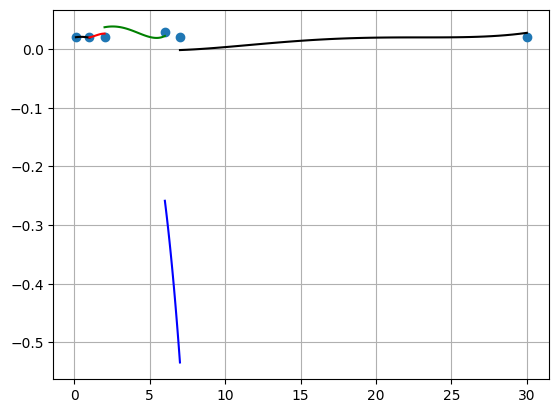

In [4]:
#  Generate plot using spline values
plt.plot(x, y, 'o')
plt.grid()

u = np.linspace(0.1, 1)
plt.plot(u, np.polyval(w[0:5], u), 'k')

u = np.linspace(1, 2)
plt.plot(u, np.polyval(w[5:10], u), 'r')

u = np.linspace(2, 6)
plt.plot(u, np.polyval(w[10:15], u), 'g')

u = np.linspace(6, 7)
plt.plot(u, np.polyval(w[15:20], u), 'b')

u = np.linspace(7, 30)
plt.plot(u, np.polyval(w[20:25], u), 'k')